## RBF function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def rbf(t, h, l, tau):
    return h * np.exp(-(t - tau) ** 2 / l)

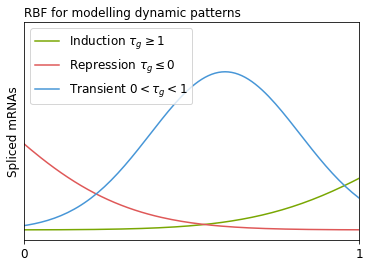

In [2]:
x_all = np.arange(-0.5, 1.5, 0.01)
y1 = rbf(x_all, h=4, l=0.1, tau=0.6)
y2 = rbf(x_all, h=5, l=0.3, tau=-0.5)
y3 = rbf(x_all, h=3, l=0.3, tau=1.5)

fig = plt.figure()

plt.plot(x_all, y3, label=r'Induction $\tau_{g} \geq 1$', color='#79a702')
plt.plot(x_all, y2, label=r'Repression $\tau_{g} \leq 0$', color='#df5858')
plt.plot(x_all, y1, label=r'Transient $0 < \tau_{g} < 1$', color='#4796d7')

plt.ylabel("Spliced mRNAs", fontsize=12)
plt.title("RBF for modelling dynamic patterns", fontsize=12, loc='left')
plt.xlim(0, 1)
plt.xticks([0, 1], fontsize=12)
plt.yticks([])
plt.legend(fontsize=12)
plt.show()


## RBF phase diagrame

In [3]:
def s_rbf(t, h, l, tau):
    return h * np.exp(-(t - tau) ** 2 / l)

def v_rbf(t, h, l, tau):
    return h * np.exp(-(t - tau) ** 2 / l) * (- 2 * (t - tau) / l)
    
def u_rbf(t, h, l, tau, w1, w2):
    s = s_rbf(t, h, l, tau)
    v = v_rbf(t, h, l, tau)
    return w1 * s + w2 * v

In [4]:
import numpy as np
h = 10
l = 3
tau = 0.5
w1, w2 = 1, 1

t_all = np.arange(-2.5, 2.5, 0.01)
s_all = s_rbf(t_all, h=h, l=l, tau=tau)
v_all = v_rbf(t_all, h=h, l=l, tau=tau)
u_all = u_rbf(t_all, h=h, l=l, tau=tau, w1=w1, w2=w2)

s_obs = s_all + np.random.normal(loc=0, scale=1, size=np.size(s_all))
u_obs = u_all + np.random.normal(loc=0, scale=1, size=np.size(u_all))

In [5]:
s_all_matrix = np.broadcast_to(np.reshape(s_all, (-1, 1)).T, (s_obs.shape[0], s_all.shape[0]))
u_all_matrix = np.broadcast_to(np.reshape(u_all, (-1, 1)).T, (u_obs.shape[0], u_all.shape[0]))
s_obs_matrix = np.broadcast_to(np.reshape(s_obs, (-1, 1)), (s_obs.shape[0], s_all.shape[0]))
u_obs_matrix = np.broadcast_to(np.reshape(u_obs, (-1, 1)), (u_obs.shape[0], u_all.shape[0]))
euclidean = np.sqrt(np.square(u_obs_matrix - u_all_matrix) + np.square(s_obs_matrix - s_all_matrix))
assign_loc = np.argmin(euclidean, axis=1)

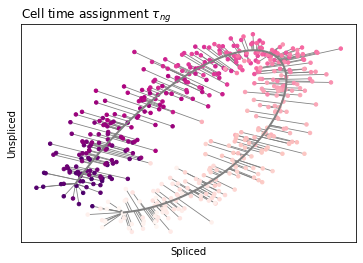

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()

for i in range(len(s_obs)):
    plt.plot([s_obs[i], s_all[assign_loc[i]]], 
            [u_obs[i], u_all[assign_loc[i]]], 
            c='grey', linewidth=0.8, zorder=0)

plt.scatter(x = s_obs, y = u_obs, c = t_all, cmap="RdPu_r", zorder=1, s=12)
plt.plot(s_all, u_all, color='grey', linewidth=2, zorder=2)

plt.legend([], [], frameon=False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Spliced')
plt.ylabel('Unspliced')
plt.title(r'Cell time assignment $\tau_{ng}$', loc='left')
plt.show()

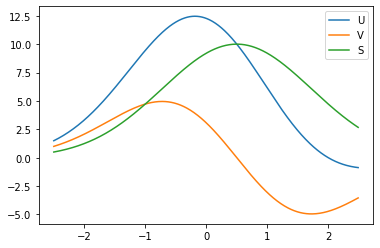

In [7]:
plt.plot(t_all, u_all, label='U')
plt.plot(t_all, v_all, label='V')
plt.plot(t_all, s_all, label='S')
plt.legend()

## Heatmap for time assignments

(0.0, 20.0, 60.0, 0.0)

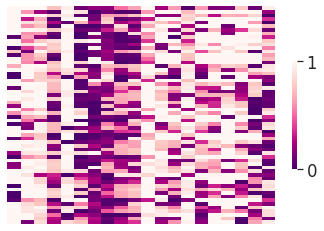

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('fig1_toydata.csv', index_col=0, header=0)
sns.set(font_scale=1.5)
sns.heatmap(data, 
    cmap='RdPu_r', cbar_kws={"shrink": .5, 
                            "location": "right", 
                            "ticks": np.arange(0, 1.1)}, 
    vmin=0, vmax=1)
plt.axis('off')

In [17]:
import numpy as np
plt.figure(figsize=(0.3, 5))
mean = np.mean(data.values, axis=1, keepdims=True)
mean = (mean - np.min(mean)) / (np.max(mean) - np.min(mean))
sns.heatmap(mean, cmap='RdPu_r', cbar=False)
plt.axis('off')

(0.0, 1.0, 60.0, 0.0)

## Transcription process reversly

In [26]:
def a_rbf(t, h, l, tau, beta, gamma):
    s = s_rbf(t, h, l, tau)
    v = v_rbf(t, h, l, tau)
    u = u_rbf(t, h, l, tau, beta, gamma) 
    return beta * u + gamma * v / beta + (v * (-2 * (t - tau) / l) + s * (-2 / l)) / beta

In [27]:
import numpy as np
import matplotlib.pyplot as plt
h = 10
l = 3
tau = 0.5
beta, gamma = 1, 1

t_all = np.arange(-3, 3, 0.01)
s_all = s_rbf(t_all, h=h, l=l, tau=tau)
v_all = v_rbf(t_all, h=h, l=l, tau=tau)
u_all = u_rbf(t_all, h=h, l=l, tau=tau, beta=beta, gamma=gamma)
a_all = a_rbf(t_all, h=h, l=l, tau=tau, beta=beta, gamma=gamma)

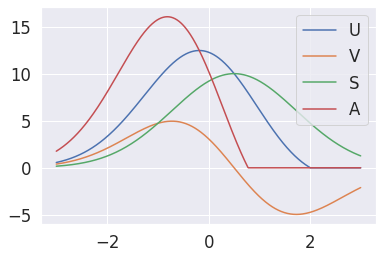

In [37]:
u_all[u_all < 0] = 0
a_all[a_all < 0] = 0
plt.plot(t_all, u_all, label='U')
plt.plot(t_all, v_all, label='V')
plt.plot(t_all, s_all, label='S')
plt.plot(t_all, a_all, label='A')
plt.legend()